# Roller Coaster
Project Goals

We will work to create several data visualizations that will give we insight into the world of roller coasters.

Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today we will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
df_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')

In [4]:
# print(df_steel.head())
df_wood.head()
# print(df_wood[df_wood.Name == 'El Toro'])
# df_wood.Park.unique())
# print(df_wood.Name.unique())

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


# Visualiztion 1

 Function that will plot the ranking of a given roller coaster over time as a line.

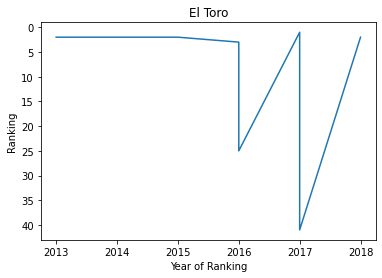

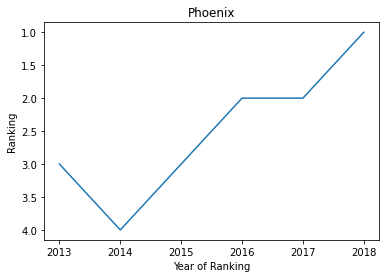

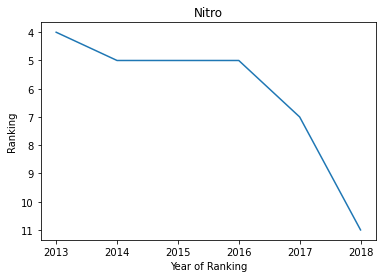

In [7]:
def ranking_over_time(name,df):
    ranking = df[(df.Park == name) | (df.Name == name)]
    ranking_new = ranking[['Rank','Year of Rank']]
    ax = plt.subplot()
    plt.plot(ranking_new['Year of Rank'],ranking_new['Rank'])
    ax.invert_yaxis()
    plt.xlabel('Year of Ranking')
    plt.ylabel('Ranking')
    plt.title(name)
    plt.show()


    
ranking_over_time("El Toro",df_wood)    
ranking_over_time("Phoenix",df_wood)    
ranking_over_time('Nitro',df_steel)

# Visualization 2

A function that will plot the ranking of two given roller coasters over time as lines.

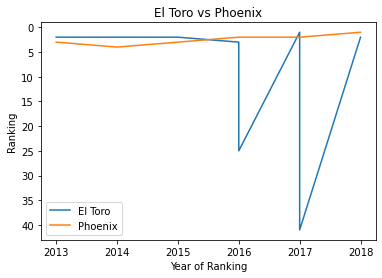

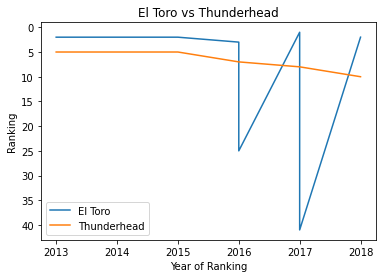

<Figure size 432x288 with 0 Axes>

In [12]:
def vs_ranking(name1,df1,name2,df2):
    ranking1 = df1[(df1.Park == name1) | (df1.Name == name1)]
    ranking_new1 = ranking1[['Rank','Year of Rank']]
    ranking2 = df2[(df2.Park == name2) | (df2.Name == name2)]
    ranking_new2 = ranking2[['Rank','Year of Rank']]
    ax = plt.subplot()
    plt.plot(ranking_new1['Year of Rank'],ranking_new1['Rank'])
    plt.plot(ranking_new2['Year of Rank'],ranking_new2['Rank'])
    ax.invert_yaxis()
    plt.xlabel('Year of Ranking')
    plt.ylabel('Ranking')
    plt.title(f'{name1} vs {name2}')
    plt.legend([name1,name2])
    plt.show()
    plt.clf()
    
vs_ranking("El Toro",df_wood,'Phoenix',df_wood)    
vs_ranking("El Toro",df_wood,'Thunderhead',df_wood)    


    
    

# Visualization 3

A function that will plot the ranking of the top n ranked roller coasters over time as lines.

<ipython-input-16-fc3e8d47d43a>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


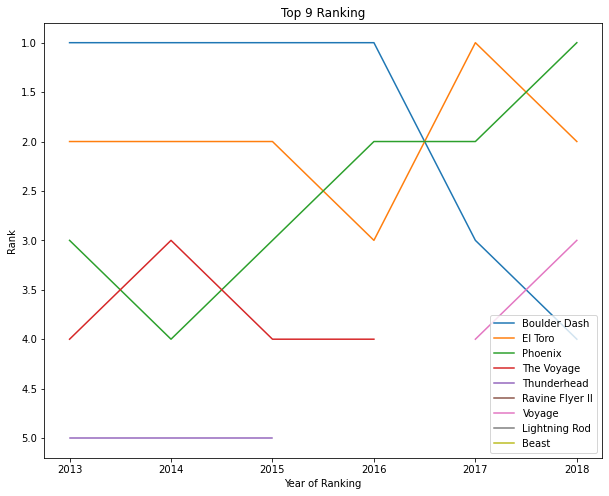

<ipython-input-16-fc3e8d47d43a>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


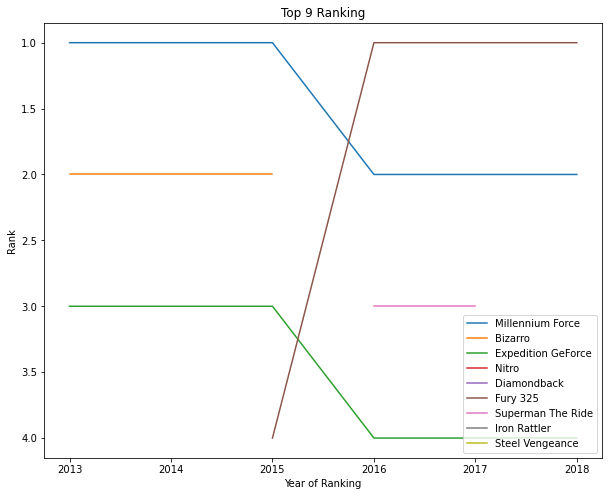

In [16]:
def nrank(n,df):
    ranking1 = df[(df.Rank < n)]
    legend =[]
    plt.figure(figsize=(10,8))
    for i in ranking1.Name.unique() :
        ranking2 = ranking1[(ranking1.Park == i) | (ranking1.Name == i)]
        x = ranking2['Year of Rank']
        y = ranking2['Rank']
        plt.plot(x,y)
        legend.append(i)    
        
    ax = plt.subplot()
    plt.xlabel('Year of Ranking')
    plt.ylabel('Rank')
    plt.title('Top 9 Ranking')
    plt.legend(legend,loc =4)
    ax.invert_yaxis()
    plt.show()    
#     for i in range(n):
#         plt.plot(x,y)
#     print(ranking1)
nrank(6,df_wood)    
nrank(5,df_steel)

# Visualization 4 (statistics of roller coasters)


In [18]:
df_cc = pd.read_csv('roller_coasters.csv')
df_cc.head()
# # df_cc.name.unique()
# df_cc.status.unique()
# df_test = df_cc[df_cc.status =='status.operating']
# len(df_test)

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


A function that plots a histogram of any numeric column of the roller coaster DataFrame.

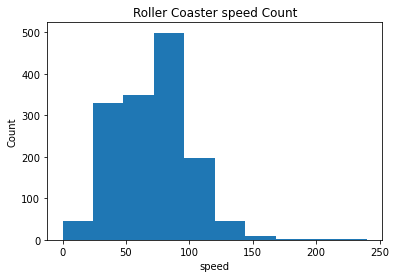

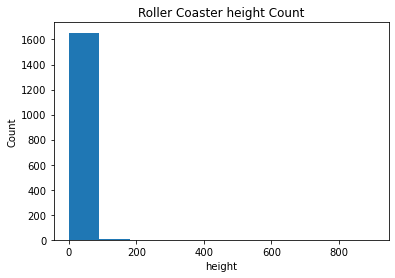

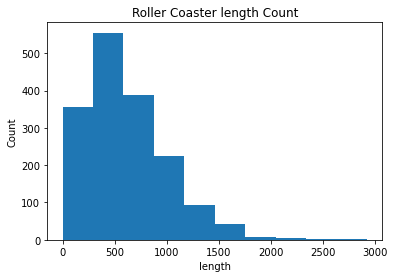

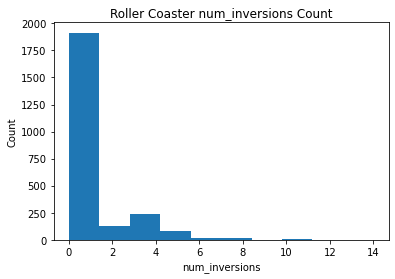

In [24]:
def any_num(value,df):
    plt.hist(df[value])
    plt.xlabel(value)
    plt.ylabel('Count')
    plt.title(f'Roller Coaster {value} Count')
    plt.show()
    
    
any_num('speed',df_cc)    
any_num('height',df_cc)    
any_num('length',df_cc)  
any_num('num_inversions',df_cc)  





A function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park.

<ipython-input-25-6c37449939ff>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax =plt.subplot()


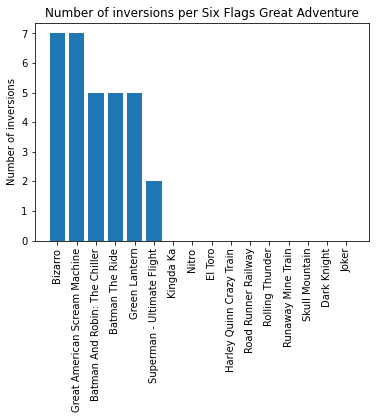

In [25]:
df_cc.head()
dfq = df_cc[df_cc.park == 'Six Flags Great Adventure']
dfq.head()
def bar(name,df):
    new_df = df[df.park == name]
    x = range(len(new_df))
    new_df = new_df.sort_values('num_inversions',ascending = False)
    y = new_df['num_inversions']
    plt.bar(x,y)
    ax =plt.subplot()
    ax.set_xticks(x)
    ax.set_xticklabels(np.array(new_df['name']),rotation = 90)
    plt.ylabel('Number of inversions')
    plt.title(f'Number of inversions per {name}')
    plt.show

    
bar('Six Flags Great Adventure',df_cc)


A function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely').

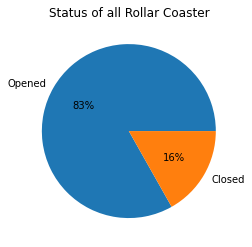

In [26]:
def pie(df):
    opened = df[df.status == 'status.operating']
    closed = df[df.status == 'status.closed.definitely']
    len_opened = len(opened)
    len_closed = len(closed)
    plt.pie([len_opened,len_closed],labels = ['Opened','Closed'],autopct='%0.02d%%')
    plt.title('Status of all Rollar Coaster')
    plt.show()
    
pie(df_cc)    

A function that creates a scatter plot of two numeric columns of the roller coaster DataFrame.

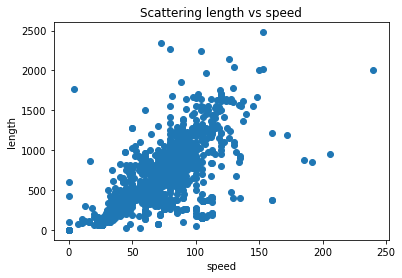

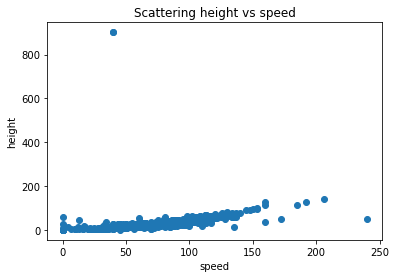

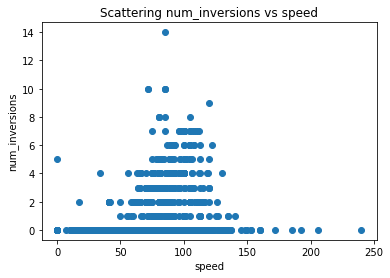

In [94]:
def scatter(value1,value2,df):
    plt.scatter(df[value1],df[value2])
    plt.xlabel(value1)
    plt.ylabel(value2)
    plt.title(f'Scattering {value2} vs {value1}')
    plt.show()
    
scatter('speed','length',df_cc)    
scatter('speed','height',df_cc)    
scatter('speed','num_inversions',df_cc)    

In this way,

By providing easy-to-understand visual representations of data, it helps employees make more informed decisions based on that data. Presenting data in visual form can make it easier to comprehend, enable people to obtain insights more quickly.